In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
timeline_df_redo = pd.read_excel ('../Data/TEIS-NSS Project Data 10-2022.xlsx', sheet_name='Elig Timeline Rpt 2018-2022')
timeline_df_redo

,District,Child ID,Child Status,Child Phase,Init. IFSP Due Date,IFSP Due Date,IFSP Late Reason,Active Ref. Date,Parent Consent/Intake Date,Date Dev. Evaluator Rec'd. Ref.,...,# Days Parent Consent to Dev. Eval.,# Days Dev. Evaluator Assigned to Dev. Eval.,1st Date Requested to Receipt of Med. Records,# Days Dev. Eval. to Elig. Det.,# Days Ref. to Elig. Det.,Init. Elig. Decision,Init. Elig. Category,Init. Elig. Det. Date,Exit Date,Exit Reason
0,ET,453926,Inactive,IFSP,2019-03-04,2019-03-27,System,2019-01-18,2019-02-04,2019-01-22 00:00:00,...,17.0,30.0,NaN,4.0,38.0,Eligible,Developmental Evaluation,2019-02-25,2020-01-11,618 - Part B eligible
1,ET,431729,Inactive,IFSP,2018-10-26,2018-10-26,NaN,2018-09-11,2018-09-25,2018-09-12 00:00:00,...,0.0,13.0,NaN,6.0,20.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2018-10-01,2020-12-11,618 - Part B eligibility not determined
2,ET,462474,Inactive,IFSP,2019-06-28,2019-06-14,NaN,2019-05-14,2019-05-30,2019-05-15 00:00:00,...,0.0,15.0,0.0,1.0,17.0,Eligible,Developmental Evaluation,2019-05-31,2020-11-12,618 - Part B eligibility not determined
3,ET,446841,Inactive,Eligibility,2018-11-23,NaT,NaN,2018-10-09,2018-10-25,2018-10-11 00:00:00,...,0.0,14.0,NaN,1.0,17.0,Eligible,Diagnosed Condition,2018-10-26,2020-08-12,Parent decline
4,ET,459629,Inactive,IFSP,2019-05-16,2019-04-24,NaN,2019-04-01,2019-04-10,2019-04-02 00:00:00,...,0.0,8.0,0.0,2.0,11.0,Eligible,Developmental Evaluation,2019-04-12,2019-09-26,618 - Parent withdraw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67605,UC,509553,Inactive,IFSP,2021-10-03,2021-10-22,System,2021-08-19,2021-08-26,2021-08-23 00:00:00,...,0.0,3.0,35.0,47.0,54.0,Eligible,"Diagnosed Condition, Developmental Evaluation",2021-10-12,2021-12-10,618 - Moved out of state
67606,UC,509684,Inactive,IFSP,2021-10-07,2021-09-07,NaN,2021-08-23,2021-08-31,2021-08-24 00:00:00,...,0.0,7.0,0.0,2.0,10.0,Eligible,Developmental Evaluation,2021-09-02,2022-03-07,618 - Parent withdraw
67607,UC,526338,Inactive,IFSP,2022-05-22,2022-05-05,NaN,2022-04-07,2022-04-10,2022-04-08 00:00:00,...,1.0,3.0,0.0,2.0,6.0,Eligible,Developmental Evaluation,2022-04-13,2022-07-25,618 - Parent withdraw
67608,UC,511641,Inactive,Eligibility,2021-11-22,NaT,NaN,2021-10-08,2021-10-18,2021-10-11 00:00:00,...,0.0,7.0,NaN,11.0,21.0,Eligible,Diagnosed Condition,2021-10-29,2022-06-22,Parent decline


In [3]:
timeline_df_redo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67610 entries, 0 to 67609
Data columns (total 38 columns):
 #   Column                                            Non-Null Count  Dtype         
---  ------                                            --------------  -----         
 0   District                                          67610 non-null  object        
 1   Child ID                                          67610 non-null  int64         
 2   Child Status                                      67610 non-null  object        
 3   Child Phase                                       67610 non-null  object        
 4   Init. IFSP Due Date                               67610 non-null  datetime64[ns]
 5   IFSP Due Date                                     33237 non-null  datetime64[ns]
 6   IFSP Late Reason                                  4780 non-null   object        
 7   Active Ref. Date                                  67610 non-null  datetime64[ns]
 8   Parent Consent/Intake Date

In [4]:
timeline_df_redo['Exit Reason'].value_counts()

Parent decline                                                          12725
Ineligible for Part C                                                   10340
Unable to contact                                                        8748
618 - Parent withdraw                                                    7111
618 - Part B eligibility not determined                                  6715
618 - Part B eligible                                                    5508
618 - Attempts to contact unsuccessful                                   2721
No meeting occurred                                                      1920
618 - Moved out of state                                                 1052
618 - Not eligible for Part B – Exit with referral to other programs      938
618 - Not eligible for Part B – Exit with no referrals                    704
Referral less than 45 days                                                608
618 - Completion of IFSP/ no longer requires services           

In [6]:
exit_df_redo = pd.read_excel ('../Data/TEIS-NSS Project Data 10-2022.xlsx', sheet_name='ECO with Exit21-22')
exit_df_redo

,DISTRICT,CHILD_ID,ECO_Entry_DATE,Ent SOCIAL_SCALE,Ent KNOWLEDGE_SCALE,Ent APPROPRIATE_ACTION_SCALE,ECO_Exit_DATE,Exit SOCIAL_SCALE,Exit KNOWLEDGE_SCALE,Exit APPROPRIATE_ACTION_SCALE,...,OC2 Data Check,OC3 - a,OC3 - b,OC3 - c,OC3 - d,OC3 - e,OC3 Data Check,Days btw Initial and Exit,Days btw I-IFSP to Exit ECO,Days btw I-IFSP to entry ECO
0,ET,500335.0,2021-04-23,5.0,3.0,4.0,2021-10-23,6.0,3.0,4.0,...,1.0,NaN,1.0,NaN,NaN,NaN,1.0,206.0,183.0,0.0
1,ET,479453.0,2020-03-23,7.0,7.0,7.0,2021-08-19,7.0,7.0,7.0,...,1.0,NaN,NaN,NaN,NaN,1.0,1.0,704.0,514.0,0.0
2,ET,510663.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,115.0,-44483.0,-44483.0
3,ET,452482.0,2019-01-31,2.0,3.0,3.0,2021-11-22,5.0,3.0,5.0,...,1.0,NaN,NaN,1.0,NaN,NaN,1.0,1053.0,1026.0,0.0
4,ET,506507.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,159.0,-44434.0,-44434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8631,UC,514216.0,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,0.0,65.0,-44537.0,-44537.0
8632,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8633,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8634,NaN,NaN,NaT,NaN,NaN,NaN,NaT,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
exit_df_redo['Exit Reason'].value_counts()

618 - Parent withdraw                                                   2365
618 - Part B eligible                                                   2168
618 - Part B eligibility not determined                                 2080
618 - Attempts to contact unsuccessful                                   920
618 - Not eligible for Part B – Exit with referral to other programs     355
618 - Not eligible for Part B – Exit with no referrals                   343
618 - Moved out of state                                                 305
618 - Completion of IFSP/ no longer requires services                     76
618 - Deceased                                                            20
Name: Exit Reason, dtype: int64

In [9]:
exit_df_redo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8636 entries, 0 to 8635
Data columns (total 60 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   DISTRICT                              8633 non-null   object        
 1   CHILD_ID                              8632 non-null   float64       
 2   ECO_Entry_DATE                        5721 non-null   datetime64[ns]
 3   Ent SOCIAL_SCALE                      5721 non-null   float64       
 4   Ent KNOWLEDGE_SCALE                   5721 non-null   float64       
 5   Ent APPROPRIATE_ACTION_SCALE          5721 non-null   float64       
 6   ECO_Exit_DATE                         5721 non-null   datetime64[ns]
 7   Exit SOCIAL_SCALE                     5721 non-null   float64       
 8   Exit KNOWLEDGE_SCALE                  5721 non-null   float64       
 9   Exit APPROPRIATE_ACTION_SCALE         5721 non-null   float64       
 10  

In [10]:
timeline_df_redo_drop=timeline_df_redo[['Child ID', 'Init. Elig. Category', 'Exit Reason']]
timeline_df_redo_drop

,Child ID,Init. Elig. Category,Exit Reason
0,453926,Developmental Evaluation,618 - Part B eligible
1,431729,"Diagnosed Condition, Developmental Evaluation",618 - Part B eligibility not determined
2,462474,Developmental Evaluation,618 - Part B eligibility not determined
3,446841,Diagnosed Condition,Parent decline
4,459629,Developmental Evaluation,618 - Parent withdraw
...,...,...,...
67605,509553,"Diagnosed Condition, Developmental Evaluation",618 - Moved out of state
67606,509684,Developmental Evaluation,618 - Parent withdraw
67607,526338,Developmental Evaluation,618 - Parent withdraw
67608,511641,Diagnosed Condition,Parent decline


In [11]:
timeline_df_redo_drop_agg = timeline_df_redo_drop.groupby(['Init. Elig. Category', 'Exit Reason']).count()
timeline_df_redo_drop_agg

Child ID
Init. Elig. Category                          Exit Reason                                                 
Developmental Evaluation                      618 - Attempts to contact unsuccessful                  1923
                                              618 - Completion of IFSP/ no longer requires se...       218
                                              618 - Deceased                                            23
                                              618 - Moved out of state                                 760
                                              618 - Not eligible for Part B – Exit with no re...       590
                                              618 - Not eligible for Part B – Exit with refer...       758
                                              618 - Parent withdraw                                   5277
                                              618 - Part B eligibility not determined                 5550
                                              618 - Part B eligible                                   4560
                                              No meeting occurred                                      250
                                              Parent decline                                          1753
                                              Referral less than 45 days                                22
                                              Screening – No action is required                          1
                                              Unable to contact                                       1134
Diagnosed Condition                           618 - Attempts to contact unsuccessful                   343
                                              618 - Completion of IFSP/ no longer requires se...        38
                                              618 - Deceased                                            11
                                              618 - Moved out of state                                 122
                                              618 - Not eligible for Part B – Exit with no re...        57
                                              618 - Not eligible for Part B – Exit with refer...        94
                                              618 - Parent withdraw                                    910
                                              618 - Part B eligibility not determined                  550
                                              618 - Part B eligible                                    347
                                              No meeting occurred                                       69
                                              Parent decline                                           842
                                              Referral less than 45 days                                 4
                                              Unable to contact                                        331
Diagnosed Condition, Developmental Evaluation 618 - Attempts to contact unsuccessful                   455
                                              618 - Completion of IFSP/ no longer requires se...        22
                                              618 - Deceased                                            28
                                              618 - Moved out of state                                 170
                                              618 - Not eligible for Part B – Exit with no re...        57
                                              618 - Not eligible for Part B – Exit with refer...        86
                                              618 - Parent withdraw                                    923
                                              618 - Part B eligibility not determined                  615
                                              618 - Part B eligible                                    600
                                

In [12]:
timeline_df_redo_drop_agg_index=timeline_df_redo_drop_agg.reset_index()
timeline_df_redo_drop_agg_index

,Init. Elig. Category,Exit Reason,Child ID
0,Developmental Evaluation,618 - Attempts to contact unsuccessful,1923
1,Developmental Evaluation,618 - Completion of IFSP/ no longer requires s...,218
2,Developmental Evaluation,618 - Deceased,23
3,Developmental Evaluation,618 - Moved out of state,760
4,Developmental Evaluation,618 - Not eligible for Part B – Exit with no r...,590
5,Developmental Evaluation,618 - Not eligible for Part B – Exit with refe...,758
6,Developmental Evaluation,618 - Parent withdraw,5277
7,Developmental Evaluation,618 - Part B eligibility not determined,5550
8,Developmental Evaluation,618 - Part B eligible,4560
9,Developmental Evaluation,No meeting occurred,250


In [13]:
dev_eval =timeline_df_redo_drop_agg_index.loc[timeline_df_redo_drop_agg_index['Init. Elig. Category'].isin(['Developmental Evaluation'])]
dev_eval

,Init. Elig. Category,Exit Reason,Child ID
0,Developmental Evaluation,618 - Attempts to contact unsuccessful,1923
1,Developmental Evaluation,618 - Completion of IFSP/ no longer requires s...,218
2,Developmental Evaluation,618 - Deceased,23
3,Developmental Evaluation,618 - Moved out of state,760
4,Developmental Evaluation,618 - Not eligible for Part B – Exit with no r...,590
5,Developmental Evaluation,618 - Not eligible for Part B – Exit with refe...,758
6,Developmental Evaluation,618 - Parent withdraw,5277
7,Developmental Evaluation,618 - Part B eligibility not determined,5550
8,Developmental Evaluation,618 - Part B eligible,4560
9,Developmental Evaluation,No meeting occurred,250


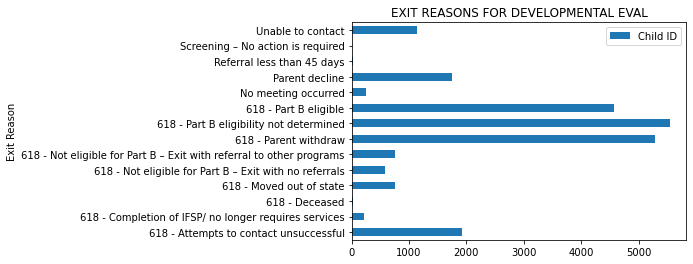

In [29]:
dev_eval_chart = dev_eval.plot(title=
                               "EXIT REASONS FOR DEVELOPMENTAL EVAL", x='Exit Reason', y=['Child ID'], kind='barh')
                               
                               

In [15]:
diag_eval =timeline_df_redo_drop_agg_index.loc[timeline_df_redo_drop_agg_index['Init. Elig. Category'].isin(['Diagnosed Condition'])]
diag_eval

,Init. Elig. Category,Exit Reason,Child ID
14,Diagnosed Condition,618 - Attempts to contact unsuccessful,343
15,Diagnosed Condition,618 - Completion of IFSP/ no longer requires s...,38
16,Diagnosed Condition,618 - Deceased,11
17,Diagnosed Condition,618 - Moved out of state,122
18,Diagnosed Condition,618 - Not eligible for Part B – Exit with no r...,57
19,Diagnosed Condition,618 - Not eligible for Part B – Exit with refe...,94
20,Diagnosed Condition,618 - Parent withdraw,910
21,Diagnosed Condition,618 - Part B eligibility not determined,550
22,Diagnosed Condition,618 - Part B eligible,347
23,Diagnosed Condition,No meeting occurred,69


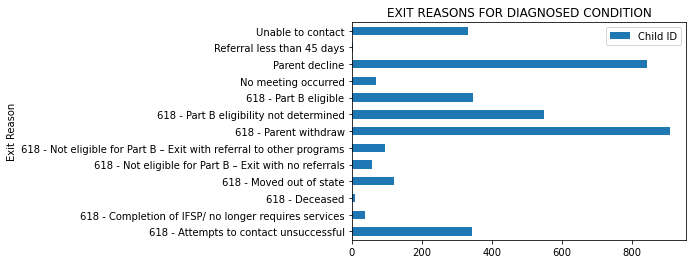

In [31]:
diagnosis_chart = diag_eval.plot(title=
                                 "EXIT REASONS FOR DIAGNOSED CONDITION", x='Exit Reason', y=['Child ID'], kind='barh')

In [19]:
dev_and_diag_eval =timeline_df_redo_drop_agg_index.loc[timeline_df_redo_drop_agg_index['Init. Elig. Category'].isin(['Diagnosed Condition, Developmental Evaluation'])]
dev_and_diag_eval

,Init. Elig. Category,Exit Reason,Child ID
27,"Diagnosed Condition, Developmental Evaluation",618 - Attempts to contact unsuccessful,455
28,"Diagnosed Condition, Developmental Evaluation",618 - Completion of IFSP/ no longer requires s...,22
29,"Diagnosed Condition, Developmental Evaluation",618 - Deceased,28
30,"Diagnosed Condition, Developmental Evaluation",618 - Moved out of state,170
31,"Diagnosed Condition, Developmental Evaluation",618 - Not eligible for Part B – Exit with no r...,57
32,"Diagnosed Condition, Developmental Evaluation",618 - Not eligible for Part B – Exit with refe...,86
33,"Diagnosed Condition, Developmental Evaluation",618 - Parent withdraw,923
34,"Diagnosed Condition, Developmental Evaluation",618 - Part B eligibility not determined,615
35,"Diagnosed Condition, Developmental Evaluation",618 - Part B eligible,600
36,"Diagnosed Condition, Developmental Evaluation",No meeting occurred,57


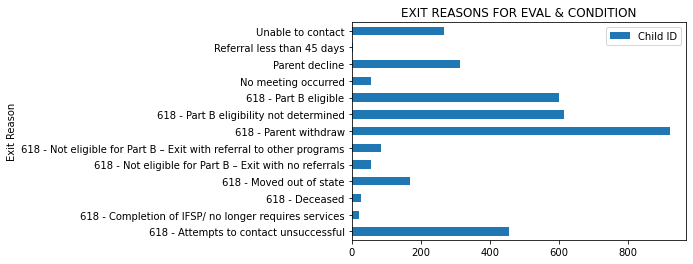

In [33]:
dev_and_diag_chart = dev_and_diag_eval.plot(title="EXIT REASONS FOR EVAL & CONDITION", x='Exit Reason', y=['Child ID'], kind='barh')

In [34]:
merged_exit_reasons_all = merged_exit_reasons.merge(dev_and_diag_eval, left_on='Exit Reason', right_on='Exit Reason')
merged_exit_reasons_all

NameError: name 'merged_exit_reasons' is not defined

In [ ]:
plt.scatter(gdp_and_internet_use_2014.Internet_Users_Pct,gdp_and_internet_use_2014.GDP_Per_Capita)
plt.xlabel('2014 Percent Using the Internet')
plt.ylabel('2014 GDP Per Capita')
plt.show ;